# Subpackage 1

### Testing the exponential module

In [1]:
# The exponential module returns the values of the probability density function, the cumulative distribution function as well as the quantile 
# of the exponential distribution. 
from distributions.probability.exponential import Exponential
obj1 = Exponential()
print(obj1.pdf(x = 3, lam = 4))
print(obj1.cdf(x = 3, lam = 4))
print(obj1.quantile(p = 0.25, lam = 4))

2.457684941331284e-05
0.9999938557876467
0.07192051811294523


### Testing the gamma module

In [2]:
# The gamma module returns the values of the probability density function, the cumulative distribution function as well as the quantile 
# of the gamma distribution. 
from distributions.probability.gamma import Gamma
obj2 = Gamma()
print(obj2.pdf(x = 3, alpha = 2, lam = 4))
print(obj2.cdf(x = 3, alpha = 2, lam = 4))
print(obj2.quantile(p = 0.25, alpha = 2, lam = 4))

0.00029492219295975406
0.9999201252394068
0.24031969077869428


### Testing the poisson module

In [3]:
# The poisson module returns the values of the probability density function, the cumulative distribution function as well as the quantile 
# of the poisson distribution. 
from distributions.probability.poisson import Poisson
obj3 = Poisson()
print(obj3.pdf(x = 3, lam = 4))
print(obj3.cdf(x = 3, lam = 4))
print(obj3.quantile(p = 0.25, lam = 4))

0.19536681481316456
0.43347012036670884
3.0


# Subpackage 2

### Testing the mle module

In [4]:
# We randomly generated exponential, poisson and gamma data and exported them in a csv file in order to demonstrate how the functions work
# The files can be found in the github repository.

# The idea of the mle module is to calculate the mle estimates of data under the assumption of a specific distribution.

In [6]:
# 1- Lets import the data from these 3 distributions with the readData method in the mle module

from distributions.estimation.mle import readData

exp_data = readData('test_files/exp_rate4.csv') #exponential with lambda = 4
gamma_data = readData('test_files/gamme_shape2_rate4.csv') #gamma with alpha = 2, lambda = 4
pois_data = readData('test_files/pois_rate4.csv') #poisson with lambda = 4

In [7]:
# 2- We can now calculate the mle for the parameters of each of these distributions using the calculate_mle method 
#    in the mle module
from distributions.estimation.mle import calculate_mle

mle_exp = calculate_mle('exponential', exp_data)
mle_gamma = calculate_mle('gamma', gamma_data)
mle_pois = calculate_mle('poisson', pois_data)

print(mle_exp)
print(mle_gamma)
print(mle_pois)

4.14875716930799
[2.0602765050138685, 4.173542439103513]
3.992992992992993


In [8]:
# 3- We can also try and find the mle estimates for the poisson distribution on the exponential data for example

calculate_mle('poisson', exp_data)

# this returns an error because for the poisson distribution to be suitable, the data must be discrete which is not the case
# in the data generated by an exponential distribution


ValueError: Poisson data must be discrete (non-negative integers)

In [9]:
# 4- We could also try and find the mle estimates for the gamma distribution using the exponential data (in theory, we know
#     that we should get a mle estimate for the shape parameter close to 1 because an exponential distribution is a special
#     case of a gamma where alpha = 1)

calculate_mle('gamma', exp_data)

[1.038532053781667, 4.311042270095524]

### Testing the plot module


In [10]:
# The idea behind the plot module is to provide a tool to easily verify if the response variable in a given data set
# can be approximated using a specific distribution (exponential, gamma or poisson). 

# The hist method graphs a histogram of the empirical data and adds a curve of the density of the distribution. The 
# maximum likelihood estimates are used as estimates for the parameters of the said distribution. If the curve of the density and the 
# empirical histogram are similar, then we can say that the response variable can be approximated using this distribution.


In [11]:
import matplotlib.pyplot as plt
from distributions.estimation.plot import hist


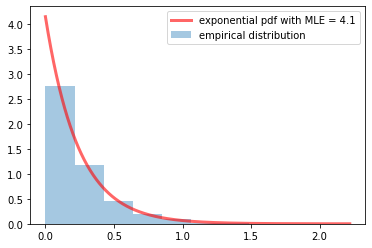

In [12]:
x = hist('exponential', exp_data)

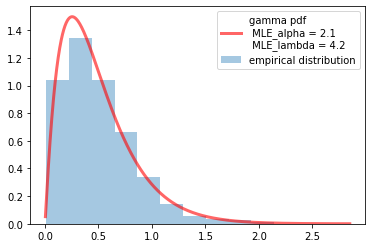

In [13]:
x = hist('gamma', gamma_data)

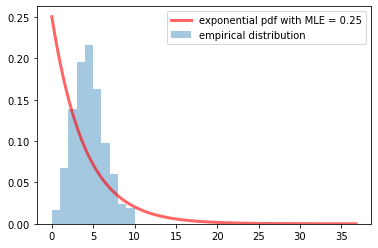

In [14]:
x = hist('exponential', pois_data) # We see that the exponential distribution is not a good approximation for our 
                                    # poisson response variable

In [15]:
# The qqplot method produces the QQ-plot of the quantiles for the distribution versus the quantiles of the empirical data.
# The maximum likelihood estimates are used as estimates for the parameters of the said distribution. If the QQ-plot returned forms a 
# somewhat straight diagonal line (meaning the quantiles are similar), then we can say that the response variable can be 
# approximated using this distribution.

numpy.ndarray

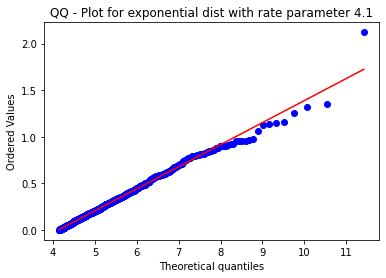

In [18]:
from distributions.estimation.plot import qqplot
x = qqplot('exponential', exp_data)
type(x[0][1])

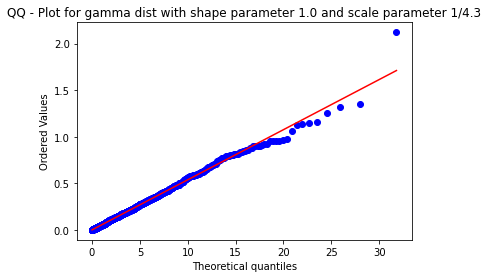

In [19]:
x = qqplot('gamma', exp_data)

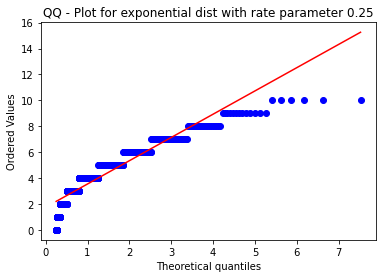

In [20]:
x = qqplot('exponential', pois_data) # We see that the exponential is not a good distribution to approximate our response 
                                      # variable that is poisson distributed

In [21]:
# The boxplot method produces a box-and-whisker plot of the response variable. This can be used in order to visualize the 
# range of values in our data. If we have negative values, we already know that the poisson, gamma or exponential distribution
# will not be good distributions to approximate the response variable because their domain is non-negative.

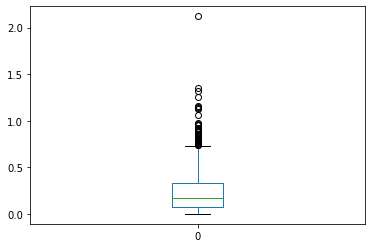

In [22]:
from distributions.estimation.plot import boxplot
x = boxplot(exp_data)

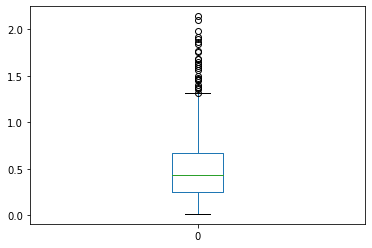

In [23]:
x = boxplot(gamma_data)

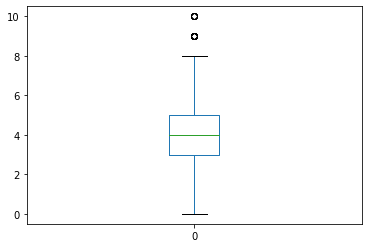

In [24]:
x = boxplot(pois_data)

### Testing the summary module

In [26]:
# This module allows us to get pertinent informatin on our data sample
from distributions.estimation.summary import summary, contains_all_ints, is_non_negative

print(summary(exp_data))
print(contains_all_ints(exp_data))
print(is_non_negative(exp_data))


{'Min': 0.000146105, 'Max': 2.120882505, 'Variance': 0.05529326559058464, 'Mean': 0.24103604023823824}
False
True
